In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

Titanic_train = pd.read_csv("titanic_train.csv")
Titanic_test = pd.read_csv("titanic_test.csv")

Titanic_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C,0
6,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1
7,3,"Jonkoff, Mr. Lalio",male,23.00,0,0,349204,7.8958,NaN,S,0
8,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
9,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.0500,NaN,S,0


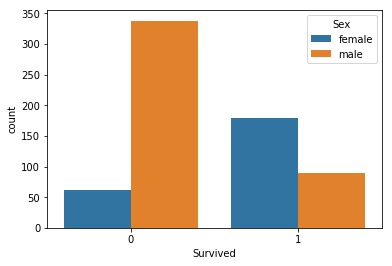

In [29]:
sns.countplot(x='Survived',hue='Sex',data = Titanic_train)

In [30]:
Titanic_train.isnull().sum()


Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

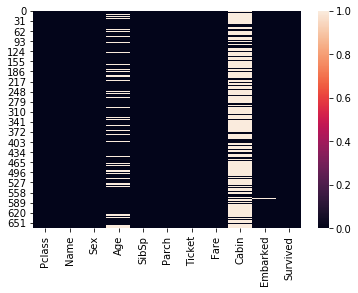

In [32]:
sns.heatmap(Titanic_train.isnull())

In [33]:
def mean_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        if pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [34]:
Titanic_train['Age'] = Titanic_train[['Age','Pclass']].apply(mean_age,axis=1)

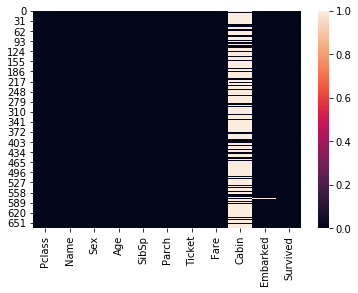

In [35]:
sns.heatmap(Titanic_train.isnull())

In [38]:
Titanic_train.drop('Cabin',axis = 1,inplace = True)

KeyError: "['Cabin'] not found in axis"

In [42]:
sex = pd.get_dummies(Titanic_train['Sex'],drop_first = True)
embark= pd.get_dummies(Titanic_train['Embarked'],drop_first = True)

In [45]:
train = pd.concat([Titanic_train,sex,embark],axis = 1)

In [48]:
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace=True)

In [54]:
x = train.drop('Survived',axis = 1)
y = train['Survived']

In [58]:
Titanic_test['Age'] = Titanic_test[['Age','Pclass']].apply(mean_age,axis=1)
sex1 = pd.get_dummies(Titanic_test['Sex'],drop_first = True)
embark1= pd.get_dummies(Titanic_test['Embarked'],drop_first = True)
test = pd.concat([Titanic_test,sex1,embark1],axis = 1)
test.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace=True)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(test)

df = pd.DataFrame(x_train_scaled)

from sklearn.linear_model import LinearRegression

alg = LogisticRegression()
alg.fit(x_train_scaled,y)
yp = alg.predict(x_test_scaled)

C:\Users\Puneet\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Puneet\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Puneet\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Puneet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
df = pd.DataFrame(predictions)
df.to_csv(path_or_buf="Solution_Titanic.csv",index=False,encoding='utf-8',header = None)
ans = pd.read_csv("Solution_Titanic.csv")

ans

,0
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0
